In [5]:
#librarys
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu

# Lade Modul neu, um Änderungen zu übernehmen
import importlib
if 'utils_functions' in sys.modules:
    importlib.reload(sys.modules['utils_functions'])

from utils_functions import to_float_array, df_d0, dataframe1, fit_exponential_decay, plot_data_with_fits, plot_parameter_histograms, fit_linear, plot_linear_fits, plot_slope_histogram,df_d0_absolut, dataframe1_absolut
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# Stelle sicher, dass der Excel-Reader vorhanden ist
!pip install -q openpyxl || echo "openpyxl already available"

Funktionen erfolgreich definiert:
1. fit_exponential_decay(data_frames)
2. plot_data_with_fits(results, title, save_path, uniform_axes)
3. plot_parameter_histograms(results, save_path, figsize)
4. fit_linear(data_frames)
5. plot_linear_fits(results, title, save_path, uniform_axes)
6. plot_slope_histogram(results, save_path, figsize)



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [41]:
# Efflux Daten importieren
path1_0 = "/workspaces/EWT/EWT9/data/Efflux/Efflux_I1_0.xlsx"
path1_0_CCCP = "/workspaces/EWT/EWT9/data/Efflux/Efflux_I1_0_CCCP.xlsx"
path1_1 ="/workspaces/EWT/EWT9/data/Efflux/Efflux_I1_1.xlsx"
path1_1_CCCP = "/workspaces/EWT/EWT9/data/Efflux/Efflux_I1_1_CCCP.xlsx"
path1_2 ="/workspaces/EWT/EWT9/data/Efflux/Efflux_I1_2.xlsx"
path1_2_CCCP = "/workspaces/EWT/EWT9/data/Efflux/Efflux_I1_2_CCCP.xlsx"

df_E_I1_0 = pd.read_excel(path1_0, skiprows=74, decimal =',')
df_E_I1_0= df_E_I1_0.drop(df_E_I1_0.index[1:29])

df_E_I1_0_CCCP = pd.read_excel(path1_0_CCCP, skiprows=74, decimal =',')
df_E_I1_0_CCCP= df_E_I1_0_CCCP.drop(df_E_I1_0_CCCP.index[1:65])

df_E_I1_1 = pd.read_excel(path1_1, skiprows=74, decimal =',')
df_E_I1_1= df_E_I1_1.drop(df_E_I1_1.index[1:41])

df_E_I1_1_CCCP = pd.read_excel(path1_1_CCCP, skiprows=74, decimal =',')
df_E_I1_1_CCCP= df_E_I1_1_CCCP.drop(df_E_I1_1_CCCP.index[1:77])

df_E_I1_2 = pd.read_excel(path1_2, skiprows=74, decimal =',')
df_E_I1_2= df_E_I1_2.drop(df_E_I1_2.index[1:53])

df_E_I1_2_CCCP = pd.read_excel(path1_2_CCCP, skiprows=74, decimal =',')
df_E_I1_2_CCCP= df_E_I1_2_CCCP.drop(df_E_I1_2_CCCP.index[1:89])

df_E_I1_0_CCCP.head(5)

,Cycle Nr.,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,Time [s],0,3.001,6.019,9.036,12.05,15.063,18.077,21.081,24.1,...,331.404,334.419,337.436,340.452,343.47,346.487,349.501,352.516,355.523,358.542
65,F4,4058,4038.000,3967.000,3904,3857.00,3799.000,3715.000,3715.000,3631.0,...,2841.000,2855.000,2782.000,2842.000,2882.00,2805.000,2850.000,2858.000,2876.000,2828.000
66,F5,3919,3966.000,3897.000,3831,3844.00,3744.000,3757.000,3717.000,3669.0,...,2824.000,2830.000,2802.000,2845.000,2886.00,2779.000,2798.000,2783.000,2808.000,2826.000
67,F6,3855,3863.000,3765.000,3722,3737.00,3597.000,3553.000,3523.000,3448.0,...,2599.000,2584.000,2597.000,2564.000,2539.00,2570.000,2576.000,2586.000,2583.000,2546.000
68,F7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#Efflux Daten verarbeiten
E_I1_0 = dataframe1(df_E_I1_0, 0,1,2,3)
E_I1_0_CCCP = dataframe1(df_E_I1_0_CCCP, 0,1,2,3)
E_I1_1 = dataframe1(df_E_I1_1, 0,1,2,3)
E_I1_1_CCCP = dataframe1(df_E_I1_1_CCCP, 0,1,2,3)
E_I1_2 = dataframe1(df_E_I1_2, 0,1,2,3)
E_I1_2_CCCP = dataframe1(df_E_I1_2_CCCP, 0,1,2,3)

In [55]:
#Influx Daten importieren

path_influx_240= "/workspaces/EWT/EWT9/data/Influx/Uptake_240µM_all.xlsx"
path_influx_240_CCCP= "/workspaces/EWT/EWT9/data/Influx/Uptake_240µM_all_CCCP.xlsx"

df_influx_240 = pd.read_excel(path_influx_240, skiprows=74, decimal =',')
df_influx_240 = df_influx_240.drop(df_influx_240.index[list(range(1, 47)) + list(range(50, 59))+ list(range(62, 71))])

df_influx_240_CCCP = pd.read_excel(path_influx_240_CCCP, skiprows=74, decimal =',')
df_influx_240_CCCP = df_influx_240_CCCP.drop(df_influx_240_CCCP.index[list(range(1, 44)) + list(range(47, 56))+ list(range(59, 68))])   
df_influx_240_CCCP.head(50)


,Cycle Nr.,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,Time [s],0.0,4.513,9.027,13.538,18.048,22.56,27.079,31.593,36.098,...,135.332,139.838,144.346,148.855,153.375,157.882,162.419,166.928,171.434,175.964
44,I1.0+CCCP,7984.0,8395.000,8460.000,8749,8823.000,8889.00,8943.000,8921.000,8829.000,...,9413.000,9445.000,9507.000,9511.000,9544.000,9637.000,9684.000,9639.000,9694.000,9680.000
45,D8,7389.0,7845.000,7941.000,8233,8284.000,8456.00,8590.000,8608.000,8584.000,...,9074.000,9081.000,9097.000,9331.000,9222.000,9187.000,9223.000,9185.000,9232.000,9250.000
46,D9,7326.0,7479.000,7857.000,8010,8148.000,8181.00,8365.000,8443.000,8627.000,...,9058.000,9003.000,9112.000,9107.000,9162.000,9125.000,9289.000,9115.000,9192.000,9123.000
56,I1.1+CCCP,6437.0,6710.000,7456.000,8047,7982.000,8155.00,8609.000,8650.000,8701.000,...,9454.000,9458.000,9587.000,9523.000,9606.000,9435.000,9620.000,9459.000,9461.000,9477.000
57,E8,6565.0,6885.000,7413.000,7691,7903.000,8166.00,8277.000,8413.000,8588.000,...,9338.000,9353.000,9325.000,9453.000,9367.000,9447.000,9323.000,9298.000,9382.000,9452.000
58,E9,6582.0,7002.000,7422.000,7797,8066.000,8201.00,8402.000,8560.000,8638.000,...,9453.000,9419.000,9398.000,9397.000,9410.000,9467.000,9411.000,9359.000,9415.000,9326.000
68,I1.2+CCCP,7245.0,7700.000,8171.000,8480,8760.000,8990.00,9055.000,9224.000,9335.000,...,9785.000,9872.000,9749.000,9832.000,9773.000,9892.000,9911.000,9885.000,9801.000,9737.000
69,F8,7160.0,7661.000,8134.000,8546,8877.000,8989.00,9177.000,9344.000,9418.000,...,10359.000,10160.000,10172.000,10120.000,10231.000,10158.000,10152.000,10184.000,10262.000,10264.000
70,F9,7650.0,8336.000,8709.000,9042,9436.000,9727.00,9948.000,9975.000,10021.000,...,10834.000,10821.000,10829.000,10849.000,10757.000,10848.000,10863.000,10839.000,10884.000,10809.000


In [58]:
#Influx Daten verarbeitne
I_240µM_I1_0 = dataframe1(df_influx_240, 0,1,2,3)
I_240µM_I1_1 = dataframe1(df_influx_240, 0,4,5,6)
I_240µM_I1_2 = dataframe1(df_influx_240, 0,7,8,9)
I_240µM_I1_0_CCCP = dataframe1(df_influx_240_CCCP, 0,1,2,3)
I_240µM_I1_1_CCCP = dataframe1(df_influx_240_CCCP, 0,4,5,6)
I_240µM_I1_2_CCCP = dataframe1(df_influx_240_CCCP, 0,7,8,9)

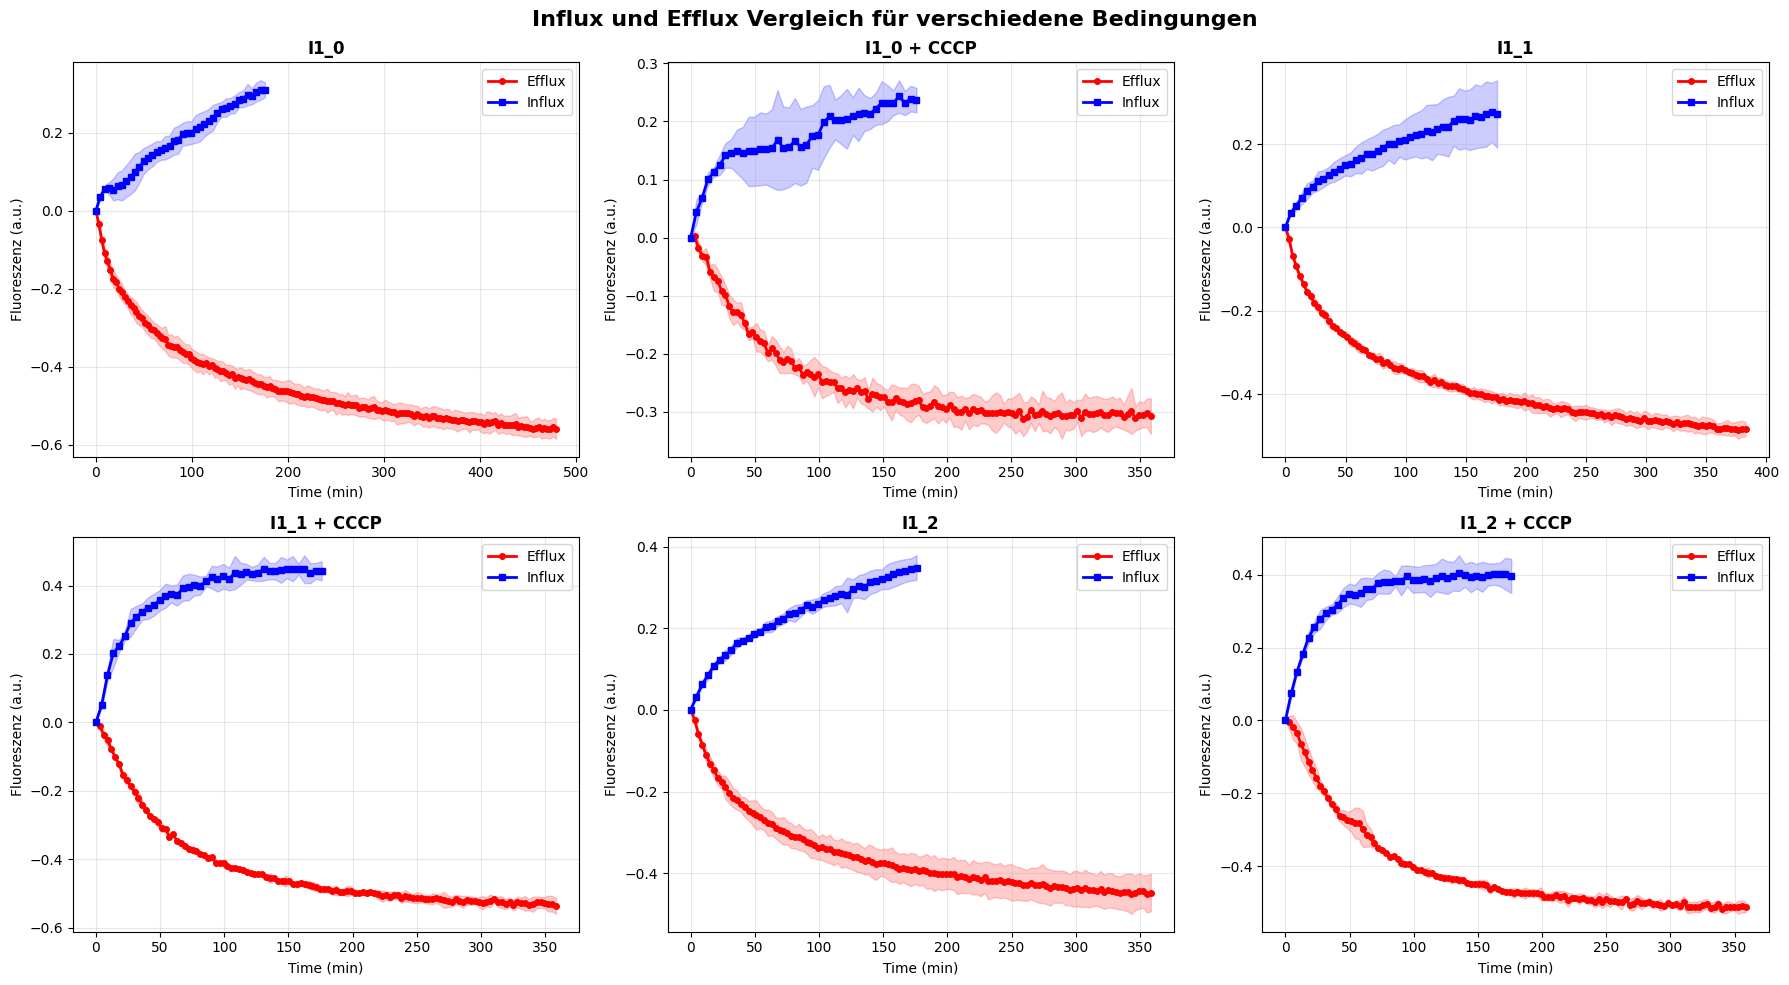

In [60]:
# Erstelle Abbildung mit 6 Subplots für Influx und Efflux Vergleich
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Influx und Efflux Vergleich für verschiedene Bedingungen', fontsize=16, fontweight='bold')

# Datensätze und Titel definieren
datasets = [
    (E_I1_0, I_240µM_I1_0, 'I1_0'),
    (E_I1_0_CCCP, I_240µM_I1_0_CCCP, 'I1_0 + CCCP'),
    (E_I1_1, I_240µM_I1_1, 'I1_1'),
    (E_I1_1_CCCP, I_240µM_I1_1_CCCP, 'I1_1 + CCCP'),
    (E_I1_2, I_240µM_I1_2, 'I1_2'),
    (E_I1_2_CCCP, I_240µM_I1_2_CCCP, 'I1_2 + CCCP')
]

# Durch jeden Subplot iterieren
for idx, (efflux_data, influx_data, title) in enumerate(datasets):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Efflux plotten
    if 'Time' in efflux_data.columns:
        time_efflux = efflux_data['Time']
        # Berechne Mittelwert und Std über numerische Spalten (außer Time)
        numeric_cols_efflux = efflux_data.select_dtypes(include=[np.number]).columns.drop('Time', errors='ignore')
        mean_efflux = efflux_data["Mittelwerte"]
        std_efflux = efflux_data["Standardabweichung"]
        
        ax.plot(time_efflux, mean_efflux, 'o-', color='red', label='Efflux', linewidth=2, markersize=4)
        ax.fill_between(time_efflux, mean_efflux - std_efflux, mean_efflux + std_efflux, 
                        color='red', alpha=0.2)
    
    # Influx plotten
    if 'Time' in influx_data.columns:
        time_influx = influx_data['Time']
        numeric_cols_influx = influx_data.select_dtypes(include=[np.number]).columns.drop('Time', errors='ignore')
        mean_influx = influx_data["Mittelwerte"]
        std_influx = influx_data["Standardabweichung"]
        
        ax.plot(time_influx, mean_influx, 's-', color='blue', label='Influx', linewidth=2, markersize=4)
        ax.fill_between(time_influx, mean_influx - std_influx, mean_influx + std_influx, 
                        color='blue', alpha=0.2)
    
    # Subplot formatieren
    ax.set_xlabel('Time (min)', fontsize=10)
    ax.set_ylabel('Fluoreszenz (a.u.)', fontsize=10)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [63]:
# Lineare Fits für die ersten 30 Sekunden (0.5 Minuten)
time_limit = 30  # 30 Sekunden in Minuten

# Dictionary zum Speichern der Steigungen
slopes_efflux = {}
slopes_influx = {}

datasets_dict = {
    'I1_0': (E_I1_0, I_240µM_I1_0),
    'I1_0_CCCP': (E_I1_0_CCCP, I_240µM_I1_0_CCCP),
    'I1_1': (E_I1_1, I_240µM_I1_1),
    'I1_1_CCCP': (E_I1_1_CCCP, I_240µM_I1_1_CCCP),
    'I1_2': (E_I1_2, I_240µM_I1_2),
    'I1_2_CCCP': (E_I1_2_CCCP, I_240µM_I1_2_CCCP)
}

# Für jedes Dataset die ersten 30 Sekunden fitten
for name, (efflux_data, influx_data) in datasets_dict.items():
    # Efflux Fit
    if 'Time' in efflux_data.columns and 'Mittelwerte' in efflux_data.columns:
        mask_efflux = efflux_data['Time'] <= time_limit
        time_efflux = efflux_data.loc[mask_efflux, 'Time'].values
        values_efflux = efflux_data.loc[mask_efflux, 'Mittelwerte'].values
        
        if len(time_efflux) > 1:
            slope, intercept = np.polyfit(time_efflux, values_efflux, 1)
            slopes_efflux[name] = slope
    
    # Influx Fit
    if 'Time' in influx_data.columns and 'Mittelwerte' in influx_data.columns:
        mask_influx = influx_data['Time'] <= time_limit
        time_influx = influx_data.loc[mask_influx, 'Time'].values
        values_influx = influx_data.loc[mask_influx, 'Mittelwerte'].values
        
        if len(time_influx) > 1:
            slope, intercept = np.polyfit(time_influx, values_influx, 1)
            slopes_influx[name] = slope

print("Efflux Steigungen:", slopes_efflux)
print("Influx Steigungen:", slopes_influx)

Efflux Steigungen: {'I1_0': np.float64(-0.0076515860223912956), 'I1_0_CCCP': np.float64(-0.003958875424286397), 'I1_1': np.float64(-0.007039265650168672), 'I1_1_CCCP': np.float64(-0.007281874782349526), 'I1_2': np.float64(-0.007106635586480787), 'I1_2_CCCP': np.float64(-0.007110800619875485)}
Influx Steigungen: {'I1_0': np.float64(0.001965021831209395), 'I1_0_CCCP': np.float64(0.004975000594353808), 'I1_1': np.float64(0.003910180339028243), 'I1_1_CCCP': np.float64(0.010768507388329093), 'I1_2': np.float64(0.004984160887831264), 'I1_2_CCCP': np.float64(0.010200412539520736)}


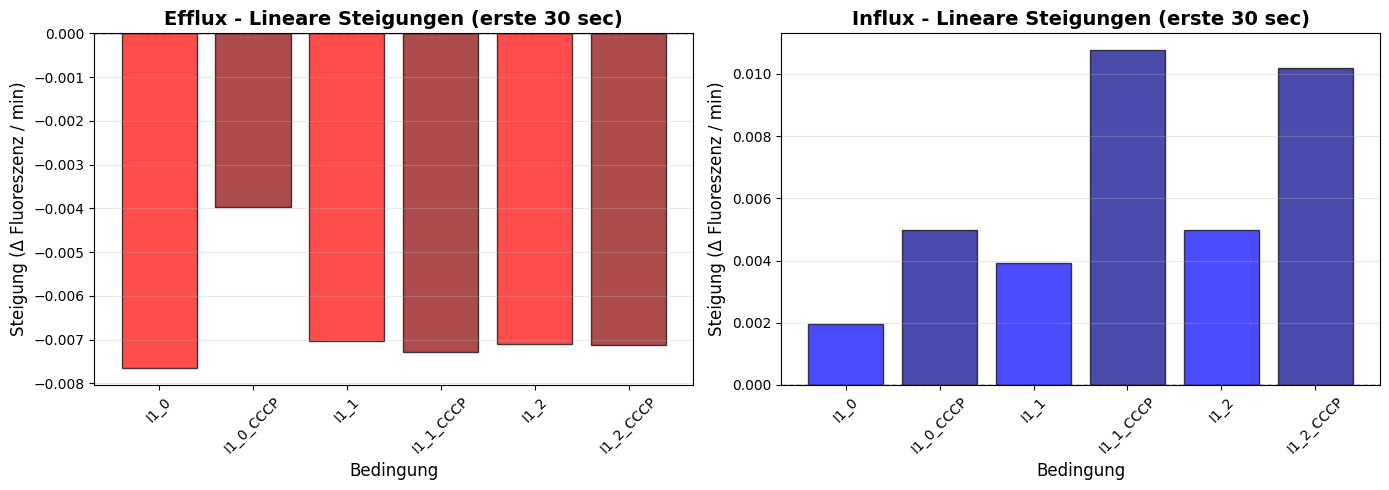

In [64]:
# Histogramm-Vergleich der Steigungen
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Efflux Steigungen
labels_efflux = list(slopes_efflux.keys())
values_efflux = list(slopes_efflux.values())
colors_efflux = ['red' if 'CCCP' not in label else 'darkred' for label in labels_efflux]

ax1.bar(labels_efflux, values_efflux, color=colors_efflux, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Bedingung', fontsize=12)
ax1.set_ylabel('Steigung (Δ Fluoreszenz / min)', fontsize=12)
ax1.set_title('Efflux - Lineare Steigungen (erste 30 sec)', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Influx Steigungen
labels_influx = list(slopes_influx.keys())
values_influx = list(slopes_influx.values())
colors_influx = ['blue' if 'CCCP' not in label else 'darkblue' for label in labels_influx]

ax2.bar(labels_influx, values_influx, color=colors_influx, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Bedingung', fontsize=12)
ax2.set_ylabel('Steigung (Δ Fluoreszenz / min)', fontsize=12)
ax2.set_title('Influx - Lineare Steigungen (erste 30 sec)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

In [ ]:
# Vergleich der Beträge der Steigungen zwischen Influx und Efflux
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Gruppiertes Balkendiagramm
conditions = ['I1_0', 'I1_0_CCCP', 'I1_1', 'I1_1_CCCP', 'I1_2', 'I1_2_CCCP']
efflux_abs = [abs(slopes_efflux.get(cond, 0)) for cond in conditions]
influx_abs = [abs(slopes_influx.get(cond, 0)) for cond in conditions]

x = np.arange(len(conditions))
width = 0.35

bars1 = axes[0].bar(x - width/2, efflux_abs, width, label='Efflux', color='red', alpha=0.7, edgecolor='black')
bars2 = axes[0].bar(x + width/2, influx_abs, width, label='Influx', color='blue', alpha=0.7, edgecolor='black')

axes[0].set_xlabel('Bedingung', fontsize=12)
axes[0].set_ylabel('|Steigung| (|Δ Fluoreszenz / min|)', fontsize=12)
axes[0].set_title('Vergleich: Beträge der Steigungen (Efflux vs Influx)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(conditions, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Subplot 2: Verhältnis Efflux/Influx
ratios = []
ratio_labels = []
for cond in conditions:
    efflux_val = abs(slopes_efflux.get(cond, 0))
    influx_val = abs(slopes_influx.get(cond, 0))
    if influx_val != 0:
        ratio = efflux_val / influx_val
        ratios.append(ratio)
        ratio_labels.append(cond)

colors_ratio = ['darkgreen' if 'CCCP' not in label else 'darkviolet' for label in ratio_labels]

axes[1].bar(ratio_labels, ratios, color=colors_ratio, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Bedingung', fontsize=12)
axes[1].set_ylabel('Verhältnis |Efflux| / |Influx|', fontsize=12)
axes[1].set_title('Verhältnis der Steigungsbeträge', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=1, color='black', linestyle='--', linewidth=1.5, label='Gleichheit')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].legend()

plt.tight_layout()
plt.show()

# Ausgabe der numerischen Werte
print("\n=== Vergleich der Steigungsbeträge ===")
for cond in conditions:
    efflux_val = abs(slopes_efflux.get(cond, 0))
    influx_val = abs(slopes_influx.get(cond, 0))
    ratio = efflux_val / influx_val if influx_val != 0 else float('inf')
    print(f"{cond:12s} | Efflux: {efflux_val:8.2f} | Influx: {influx_val:8.2f} | Verhältnis: {ratio:6.2f}")